<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#preprocessing" data-toc-modified-id="preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>preprocessing</a></span></li><li><span><a href="#split-data" data-toc-modified-id="split-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>split data</a></span></li><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Xgboost</a></span></li></ul></div>

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

In [192]:
def dummy_feature(df, variables):
    dummies = pd.DataFrame()
    for var in variables:
        dummy = pd.get_dummies(df[var], prefix=var, drop_first=True)
        dummies = pd.concat([dummies, dummy], axis=1)
        df = df.drop(var, axis=1)
    df = pd.concat([df, dummies], axis=1)
    return df

In [193]:
data1 = pd.read_csv('../dataset/Regular_Season_Batter.csv')
data1.shape

(2454, 29)

In [194]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

In [195]:
data1 = data1.set_index('batter_id')
data1 = data1.drop('batter_name', axis=1)

In [196]:
x_data, y_data = data1.drop('OPS', axis=1), data1['OPS']

# preprocessing

In [197]:
x_data['height'] = x_data['height/weight'].apply(lambda x: np.nan if str(x) == 'nan' else x.split('/')[0][:3]).astype(float)
x_data['weight'] = x_data['height/weight'].apply(lambda x: np.nan if str(x) == 'nan' else x.split('/')[1][:-2]).astype(float)
x_data['age'] = x_data.year - x_data.year_born.apply(lambda x: int(x[:4]))
x_data.starting_salary = x_data.starting_salary.apply(lambda x: x[:-2] if str(x)!='nan' else np.nan).astype(float) 
x_data = dummy_feature(x_data, ['team','position'])
x_data = x_data.drop('year_born', axis=1)
x_data = x_data.drop('height/weight', axis=1)
x_data = x_data.drop('career', axis=1)
x_data.columns

Index(['year', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB',
       'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E', 'starting_salary',
       'height', 'weight', 'age', 'team_KT', 'team_LG', 'team_NC', 'team_OB',
       'team_SK', 'team_넥센', 'team_두산', 'team_롯데', 'team_삼성', 'team_쌍방울',
       'team_우리', 'team_한화', 'team_해태', 'team_현대', 'team_히어로즈',
       'position_내야수(우투우타)', 'position_내야수(우투좌타)', 'position_내야수(좌투좌타)',
       'position_외야수(우투양타)', 'position_외야수(우투우타)', 'position_외야수(우투좌타)',
       'position_외야수(좌투좌타)', 'position_포수(우투우타)', 'position_포수(우투좌타)'],
      dtype='object')

In [198]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 344
Data columns (total 48 columns):
year                  2454 non-null int64
avg                   2428 non-null float64
G                     2454 non-null int64
AB                    2454 non-null int64
R                     2454 non-null int64
H                     2454 non-null int64
2B                    2454 non-null int64
3B                    2454 non-null int64
HR                    2454 non-null int64
TB                    2454 non-null int64
RBI                   2454 non-null int64
SB                    2454 non-null int64
CS                    2454 non-null int64
BB                    2454 non-null int64
HBP                   2454 non-null int64
SO                    2454 non-null int64
GDP                   2454 non-null int64
SLG                   2428 non-null float64
OBP                   2430 non-null float64
E                     2454 non-null int64
starting_salary       1387 non-null float64
heig

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


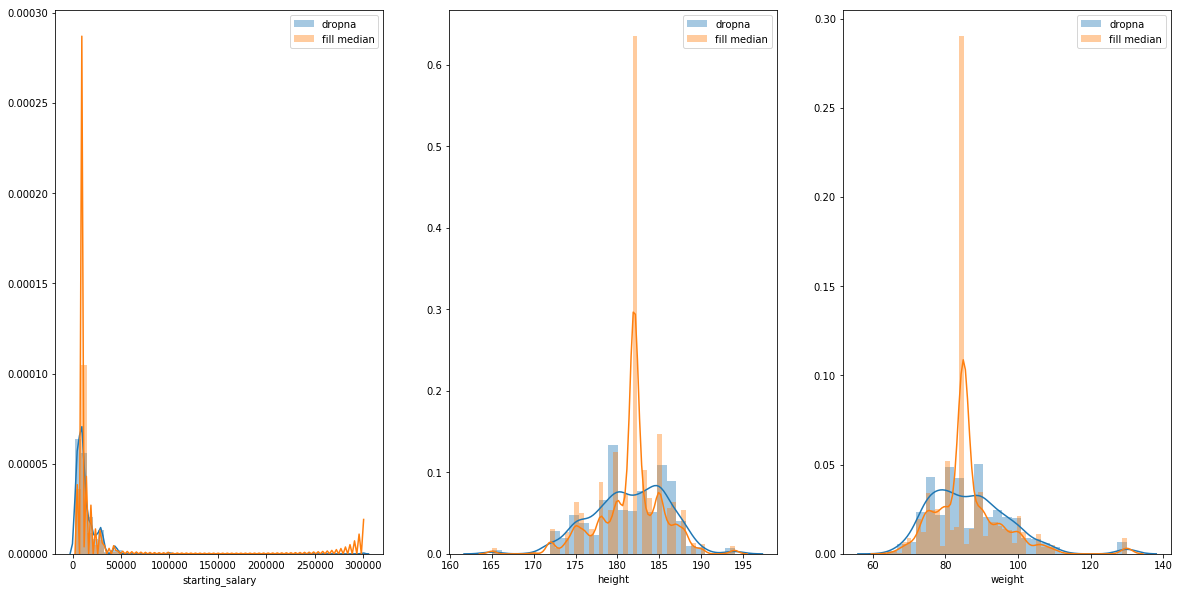

In [199]:
f, ax = plt.subplots(1,3, figsize=(20,10))
sns.distplot(x_data.starting_salary.dropna(), label='dropna', ax=ax[0])
sns.distplot(x_data.starting_salary.fillna(np.median(x_data.starting_salary.dropna())), label='fill median', ax=ax[0])
ax[0].legend()

sns.distplot(x_data.height.dropna(), label='dropna', ax=ax[1])
sns.distplot(x_data.height.fillna(np.median(x_data.height.dropna())), label='fill median', ax=ax[1])
ax[1].legend()

sns.distplot(x_data.weight.dropna(), label='dropna', ax=ax[2])
sns.distplot(x_data.weight.fillna(np.median(x_data.weight.dropna())), label='fill median', ax=ax[2])
ax[2].legend()

In [200]:
x_data.starting_salary = x_data.starting_salary.fillna(np.median(x_data.starting_salary.dropna()))
x_data.height = x_data.height.fillna(np.median(x_data.height.dropna()))
x_data.weight = x_data.weight.fillna(np.median(x_data.weight.dropna()))

**나머지 결측값은 모두 0으로 처리한다.**
- 이유는 타수가 0 이여서 OPS,SLG(장타율)는 0이고 OBP(출루율)는 타수가 아닌 사유로 생기는 경우가 있기 때문에 NaN이 아닌 값도 있다.

In [201]:
x_data[x_data.SLG.isnull() | x_data.OBP.isnull()][['AB','SLG','OBP']]

,AB,SLG,OBP
batter_id,,,
138,0,NaN,NaN
21,0,NaN,NaN
24,0,NaN,NaN
31,0,NaN,NaN
45,0,NaN,NaN
97,0,NaN,NaN
132,0,NaN,NaN
151,0,NaN,NaN
173,0,NaN,NaN


In [202]:
y_data[x_data.SLG.isnull() & x_data.OBP.isnull()]

batter_id
138   NaN
21    NaN
24    NaN
31    NaN
45    NaN
97    NaN
132   NaN
151   NaN
173   NaN
175   NaN
200   NaN
213   NaN
281   NaN
295   NaN
305   NaN
307   NaN
309   NaN
309   NaN
312   NaN
325   NaN
330   NaN
332   NaN
337   NaN
344   NaN
Name: OPS, dtype: float64

In [203]:
x_data = x_data.fillna(0)
y_data = y_data.fillna(0)

# split data

In [204]:
x_train = x_data[(x_data.year != 2018) & (x_data.year != 2017)]
x_valid = x_data[x_data.year == 2017]
x_test = x_data[x_data.year == 2018]

y_train = y_data[(x_data.year != 2018) & (x_data.year != 2017)]
y_valid = y_data[x_data.year == 2017]
y_test = y_data[x_data.year == 2018]

In [205]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(2010, 48)
(217, 48)
(227, 48)
(2010,)
(217,)
(227,)


# Xgboost

In [206]:
params = {
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "max_depth": 3,
    "min_child_weight": 5,
    "subsample": 1.0,
    "colsample_bytree": 0.7,
    "colsample_bylevel": 0.7,
    "alpha": 0,
    "lambda": 1,
    "objective": "gpu:reg:linear",
    "tree_method": "gpu_hist",
    "predictor": "gpu_predictor",
    "eval_metric":"rmse"
}
model = xgb.XGBRegressor(**params)

In [207]:
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], early_stopping_rounds=100, verbose=1)

[0]	validation_0-rmse:0.281443	validation_1-rmse:0.266825
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.257665	validation_1-rmse:0.243776
[2]	validation_0-rmse:0.23758	validation_1-rmse:0.223263
[3]	validation_0-rmse:0.216308	validation_1-rmse:0.20128
[4]	validation_0-rmse:0.197314	validation_1-rmse:0.18167
[5]	validation_0-rmse:0.180301	validation_1-rmse:0.164087
[6]	validation_0-rmse:0.164967	validation_1-rmse:0.148361
[7]	validation_0-rmse:0.152216	validation_1-rmse:0.136318
[8]	validation_0-rmse:0.140712	validation_1-rmse:0.124816
[9]	validation_0-rmse:0.129162	validation_1-rmse:0.11271
[10]	validation_0-rmse:0.120608	validation_1-rmse:0.10376
[11]	validation_0-rmse:0.11123	validation_1-rmse:0.094072
[12]	validation_0-rmse:0.104175	validation_1-rmse:0.086891
[13]	validation_0-rmse:0.097307	validation_1-rmse:0.080054
[14]	validation_0-rmse:0.09177

[137]	validation_0-rmse:0.016066	validation_1-rmse:0.013589
[138]	validation_0-rmse:0.015932	validation_1-rmse:0.013403
[139]	validation_0-rmse:0.015853	validation_1-rmse:0.013451
[140]	validation_0-rmse:0.015674	validation_1-rmse:0.013447
[141]	validation_0-rmse:0.015573	validation_1-rmse:0.013437
[142]	validation_0-rmse:0.015446	validation_1-rmse:0.013438
[143]	validation_0-rmse:0.015388	validation_1-rmse:0.013386
[144]	validation_0-rmse:0.015293	validation_1-rmse:0.013354
[145]	validation_0-rmse:0.015238	validation_1-rmse:0.013354
[146]	validation_0-rmse:0.015184	validation_1-rmse:0.013362
[147]	validation_0-rmse:0.015173	validation_1-rmse:0.013348
[148]	validation_0-rmse:0.015053	validation_1-rmse:0.013318
[149]	validation_0-rmse:0.015021	validation_1-rmse:0.013323
[150]	validation_0-rmse:0.014939	validation_1-rmse:0.01331
[151]	validation_0-rmse:0.014849	validation_1-rmse:0.013182
[152]	validation_0-rmse:0.014784	validation_1-rmse:0.013119
[153]	validation_0-rmse:0.014737	validati

[275]	validation_0-rmse:0.009763	validation_1-rmse:0.011874
[276]	validation_0-rmse:0.009741	validation_1-rmse:0.011851
[277]	validation_0-rmse:0.009725	validation_1-rmse:0.011852
[278]	validation_0-rmse:0.009716	validation_1-rmse:0.011849
[279]	validation_0-rmse:0.009706	validation_1-rmse:0.011842
[280]	validation_0-rmse:0.009646	validation_1-rmse:0.011843
[281]	validation_0-rmse:0.00964	validation_1-rmse:0.011828
[282]	validation_0-rmse:0.009606	validation_1-rmse:0.011847
[283]	validation_0-rmse:0.0096	validation_1-rmse:0.011852
[284]	validation_0-rmse:0.009586	validation_1-rmse:0.011855
[285]	validation_0-rmse:0.009564	validation_1-rmse:0.011854
[286]	validation_0-rmse:0.00954	validation_1-rmse:0.011847
[287]	validation_0-rmse:0.009535	validation_1-rmse:0.011845
[288]	validation_0-rmse:0.009484	validation_1-rmse:0.01184
[289]	validation_0-rmse:0.009479	validation_1-rmse:0.01184
[290]	validation_0-rmse:0.009458	validation_1-rmse:0.01182
[291]	validation_0-rmse:0.009403	validation_1-r

[412]	validation_0-rmse:0.006968	validation_1-rmse:0.011173
[413]	validation_0-rmse:0.006964	validation_1-rmse:0.011169
[414]	validation_0-rmse:0.006962	validation_1-rmse:0.011168
[415]	validation_0-rmse:0.006941	validation_1-rmse:0.011162
[416]	validation_0-rmse:0.006933	validation_1-rmse:0.011163
[417]	validation_0-rmse:0.006921	validation_1-rmse:0.011161
[418]	validation_0-rmse:0.006907	validation_1-rmse:0.011158
[419]	validation_0-rmse:0.006898	validation_1-rmse:0.011163
[420]	validation_0-rmse:0.006862	validation_1-rmse:0.011154
[421]	validation_0-rmse:0.006837	validation_1-rmse:0.011144
[422]	validation_0-rmse:0.006825	validation_1-rmse:0.011136
[423]	validation_0-rmse:0.006823	validation_1-rmse:0.011136
[424]	validation_0-rmse:0.006819	validation_1-rmse:0.011128
[425]	validation_0-rmse:0.006817	validation_1-rmse:0.011122
[426]	validation_0-rmse:0.006814	validation_1-rmse:0.011121
[427]	validation_0-rmse:0.006803	validation_1-rmse:0.011116
[428]	validation_0-rmse:0.006791	validat

[549]	validation_0-rmse:0.005648	validation_1-rmse:0.010598
[550]	validation_0-rmse:0.005645	validation_1-rmse:0.010595
[551]	validation_0-rmse:0.005635	validation_1-rmse:0.010594
[552]	validation_0-rmse:0.005616	validation_1-rmse:0.010596
[553]	validation_0-rmse:0.005608	validation_1-rmse:0.010599
[554]	validation_0-rmse:0.005601	validation_1-rmse:0.010595
[555]	validation_0-rmse:0.005586	validation_1-rmse:0.010593
[556]	validation_0-rmse:0.005581	validation_1-rmse:0.010597
[557]	validation_0-rmse:0.00557	validation_1-rmse:0.010591
[558]	validation_0-rmse:0.00557	validation_1-rmse:0.010591
[559]	validation_0-rmse:0.005563	validation_1-rmse:0.010588
[560]	validation_0-rmse:0.00556	validation_1-rmse:0.010582
[561]	validation_0-rmse:0.005553	validation_1-rmse:0.010578
[562]	validation_0-rmse:0.00555	validation_1-rmse:0.01058
[563]	validation_0-rmse:0.005537	validation_1-rmse:0.010583
[564]	validation_0-rmse:0.005522	validation_1-rmse:0.010571
[565]	validation_0-rmse:0.005515	validation_1

[687]	validation_0-rmse:0.004681	validation_1-rmse:0.010324
[688]	validation_0-rmse:0.004672	validation_1-rmse:0.010319
[689]	validation_0-rmse:0.004669	validation_1-rmse:0.010318
[690]	validation_0-rmse:0.004661	validation_1-rmse:0.010307
[691]	validation_0-rmse:0.004654	validation_1-rmse:0.010302
[692]	validation_0-rmse:0.004649	validation_1-rmse:0.010302
[693]	validation_0-rmse:0.00464	validation_1-rmse:0.010303
[694]	validation_0-rmse:0.004637	validation_1-rmse:0.010309
[695]	validation_0-rmse:0.004632	validation_1-rmse:0.010293
[696]	validation_0-rmse:0.004626	validation_1-rmse:0.010287
[697]	validation_0-rmse:0.00462	validation_1-rmse:0.01027
[698]	validation_0-rmse:0.004612	validation_1-rmse:0.010279
[699]	validation_0-rmse:0.004607	validation_1-rmse:0.010283
[700]	validation_0-rmse:0.004601	validation_1-rmse:0.010287
[701]	validation_0-rmse:0.004595	validation_1-rmse:0.010283
[702]	validation_0-rmse:0.00459	validation_1-rmse:0.010279
[703]	validation_0-rmse:0.004589	validation_

[824]	validation_0-rmse:0.003974	validation_1-rmse:0.010081
[825]	validation_0-rmse:0.003969	validation_1-rmse:0.010082
[826]	validation_0-rmse:0.003967	validation_1-rmse:0.010083
[827]	validation_0-rmse:0.003965	validation_1-rmse:0.010083
[828]	validation_0-rmse:0.00396	validation_1-rmse:0.010071
[829]	validation_0-rmse:0.003954	validation_1-rmse:0.010077
[830]	validation_0-rmse:0.003949	validation_1-rmse:0.010071
[831]	validation_0-rmse:0.003945	validation_1-rmse:0.01007
[832]	validation_0-rmse:0.003942	validation_1-rmse:0.010074
[833]	validation_0-rmse:0.003939	validation_1-rmse:0.01007
[834]	validation_0-rmse:0.003936	validation_1-rmse:0.010071
[835]	validation_0-rmse:0.003932	validation_1-rmse:0.010072
[836]	validation_0-rmse:0.003928	validation_1-rmse:0.010074
[837]	validation_0-rmse:0.003924	validation_1-rmse:0.010072
[838]	validation_0-rmse:0.003916	validation_1-rmse:0.010072
[839]	validation_0-rmse:0.003913	validation_1-rmse:0.010077
[840]	validation_0-rmse:0.003909	validation

[962]	validation_0-rmse:0.003439	validation_1-rmse:0.009899
[963]	validation_0-rmse:0.003433	validation_1-rmse:0.009899
[964]	validation_0-rmse:0.003425	validation_1-rmse:0.0099
[965]	validation_0-rmse:0.00342	validation_1-rmse:0.009897
[966]	validation_0-rmse:0.003417	validation_1-rmse:0.009894
[967]	validation_0-rmse:0.003415	validation_1-rmse:0.009891
[968]	validation_0-rmse:0.003411	validation_1-rmse:0.009879
[969]	validation_0-rmse:0.003409	validation_1-rmse:0.009878
[970]	validation_0-rmse:0.003406	validation_1-rmse:0.009876
[971]	validation_0-rmse:0.0034	validation_1-rmse:0.009875
[972]	validation_0-rmse:0.003397	validation_1-rmse:0.009877
[973]	validation_0-rmse:0.003391	validation_1-rmse:0.009873
[974]	validation_0-rmse:0.003389	validation_1-rmse:0.009871
[975]	validation_0-rmse:0.003387	validation_1-rmse:0.009871
[976]	validation_0-rmse:0.003386	validation_1-rmse:0.009872
[977]	validation_0-rmse:0.003382	validation_1-rmse:0.009873
[978]	validation_0-rmse:0.00338	validation_1-

[1098]	validation_0-rmse:0.003004	validation_1-rmse:0.009716
[1099]	validation_0-rmse:0.002999	validation_1-rmse:0.009712
[1100]	validation_0-rmse:0.002997	validation_1-rmse:0.009707
[1101]	validation_0-rmse:0.002994	validation_1-rmse:0.009706
[1102]	validation_0-rmse:0.002992	validation_1-rmse:0.009703
[1103]	validation_0-rmse:0.00299	validation_1-rmse:0.009703
[1104]	validation_0-rmse:0.002987	validation_1-rmse:0.0097
[1105]	validation_0-rmse:0.002986	validation_1-rmse:0.009699
[1106]	validation_0-rmse:0.002979	validation_1-rmse:0.009699
[1107]	validation_0-rmse:0.002977	validation_1-rmse:0.009696
[1108]	validation_0-rmse:0.002972	validation_1-rmse:0.009691
[1109]	validation_0-rmse:0.002968	validation_1-rmse:0.009692
[1110]	validation_0-rmse:0.002965	validation_1-rmse:0.009685
[1111]	validation_0-rmse:0.002962	validation_1-rmse:0.009685
[1112]	validation_0-rmse:0.00296	validation_1-rmse:0.009686
[1113]	validation_0-rmse:0.002957	validation_1-rmse:0.009687
[1114]	validation_0-rmse:0.0

[1233]	validation_0-rmse:0.002667	validation_1-rmse:0.009693
[1234]	validation_0-rmse:0.002666	validation_1-rmse:0.009689
[1235]	validation_0-rmse:0.002664	validation_1-rmse:0.009689
[1236]	validation_0-rmse:0.002661	validation_1-rmse:0.00969
[1237]	validation_0-rmse:0.002657	validation_1-rmse:0.009688
[1238]	validation_0-rmse:0.002654	validation_1-rmse:0.009687
[1239]	validation_0-rmse:0.00265	validation_1-rmse:0.009683
[1240]	validation_0-rmse:0.002646	validation_1-rmse:0.009675
[1241]	validation_0-rmse:0.002644	validation_1-rmse:0.009675
[1242]	validation_0-rmse:0.002641	validation_1-rmse:0.009669
[1243]	validation_0-rmse:0.002638	validation_1-rmse:0.009672
[1244]	validation_0-rmse:0.002635	validation_1-rmse:0.009672
[1245]	validation_0-rmse:0.002631	validation_1-rmse:0.009673
[1246]	validation_0-rmse:0.002629	validation_1-rmse:0.009675
[1247]	validation_0-rmse:0.002625	validation_1-rmse:0.009675
[1248]	validation_0-rmse:0.002622	validation_1-rmse:0.009675
[1249]	validation_0-rmse:0

[1368]	validation_0-rmse:0.002373	validation_1-rmse:0.009622
[1369]	validation_0-rmse:0.002371	validation_1-rmse:0.009617
[1370]	validation_0-rmse:0.002369	validation_1-rmse:0.00962
[1371]	validation_0-rmse:0.002368	validation_1-rmse:0.009619
[1372]	validation_0-rmse:0.002367	validation_1-rmse:0.009618
[1373]	validation_0-rmse:0.002364	validation_1-rmse:0.009614
[1374]	validation_0-rmse:0.002362	validation_1-rmse:0.009611
[1375]	validation_0-rmse:0.00236	validation_1-rmse:0.009612
[1376]	validation_0-rmse:0.002357	validation_1-rmse:0.009612
[1377]	validation_0-rmse:0.002356	validation_1-rmse:0.009612
[1378]	validation_0-rmse:0.002355	validation_1-rmse:0.009611
[1379]	validation_0-rmse:0.002353	validation_1-rmse:0.009612
[1380]	validation_0-rmse:0.002351	validation_1-rmse:0.009613
[1381]	validation_0-rmse:0.002348	validation_1-rmse:0.00961
[1382]	validation_0-rmse:0.002346	validation_1-rmse:0.009609
[1383]	validation_0-rmse:0.002343	validation_1-rmse:0.009604
[1384]	validation_0-rmse:0.

[1503]	validation_0-rmse:0.002142	validation_1-rmse:0.009548
[1504]	validation_0-rmse:0.002141	validation_1-rmse:0.009547
[1505]	validation_0-rmse:0.002141	validation_1-rmse:0.009547
[1506]	validation_0-rmse:0.002139	validation_1-rmse:0.009552
[1507]	validation_0-rmse:0.002138	validation_1-rmse:0.009553
[1508]	validation_0-rmse:0.002136	validation_1-rmse:0.009551
[1509]	validation_0-rmse:0.002133	validation_1-rmse:0.009549
[1510]	validation_0-rmse:0.002131	validation_1-rmse:0.009549
[1511]	validation_0-rmse:0.002127	validation_1-rmse:0.009549
[1512]	validation_0-rmse:0.002124	validation_1-rmse:0.009549
[1513]	validation_0-rmse:0.002122	validation_1-rmse:0.009546
[1514]	validation_0-rmse:0.002121	validation_1-rmse:0.009545
[1515]	validation_0-rmse:0.00212	validation_1-rmse:0.009545
[1516]	validation_0-rmse:0.002117	validation_1-rmse:0.009537
[1517]	validation_0-rmse:0.002114	validation_1-rmse:0.009539
[1518]	validation_0-rmse:0.002112	validation_1-rmse:0.009537
[1519]	validation_0-rmse:

[1638]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1639]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1640]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1641]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1642]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1643]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1644]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1645]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1646]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1647]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1648]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1649]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1650]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1651]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1652]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1653]	validation_0-rmse:0.002058	validation_1-rmse:0.009526
[1654]	validation_0-rmse

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, eval_metric='rmse', gamma=0, lambda=1,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=10000, n_jobs=1,
       nthread=None, objective='gpu:reg:linear', predictor='gpu_predictor',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0, tree_method='gpu_hist')

In [209]:
prob = model.predict(x_test, ntree_limit=model.best_iteration)
rmse = np.sqrt(np.mean(np.power(y_test-prob, 2)))
print('test RMSE: {0:.6f}'.format(rmse))

test RMSE: 0.021069


C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


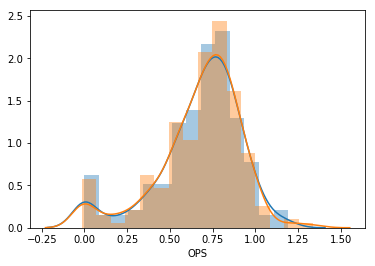

In [211]:
sns.distplot(y_test)
sns.distplot(prob)